In [ ]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# FOLDERNAME = "/Users/jamesau/Library/CloudStorage/GoogleDrive-jamesau2810@gmail.com/My Drive/Painting_data"
FOLDERNAME = "Painting_data"
# FOLDERNAME = "Colab Notebooks/assignment3"
assert FOLDERNAME is not None, "[!] Enter the foldername."
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
FOLDERNAME2 = "ust_paint_sample_photo"
# FOLDERNAME = "Colab Notebooks/assignment3"
assert FOLDERNAME2 is not None, "[!] Enter the foldername."
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrain = True)
# num_classes = 2
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


In [ ]:
loc = "/content/drive/MyDrive/Painting_data/train/"
csv_loc = loc + "_annotations.csv"
# train = pd.read_csv(r"../input/global-wheat-detection/train.csv")
train = pd.read_csv(csv_loc)
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Img305_jpg.rf.909116b839aa15e05a30952f4630b194...,640,640,painting,76,116,569,485
1,Img320_jpeg.rf.947f31e28853be2b079fe0004425678...,640,640,painting,135,30,616,595
2,Img248_jpg.rf.8ba9804a770d6bfe32e01a272502e0f6...,640,640,painting,185,80,434,451
3,Img10_jpg.rf.8fd94695bc27c12db19b3aeb34dd8b23.jpg,640,640,painting,59,19,606,614
4,Img279_jpg.rf.93efa838dc043695048ed8519aa460dc...,640,640,painting,159,96,461,495


In [ ]:
train.dtypes

filename    object
width        int64
height       int64
class       object
xmin         int64
ymin         int64
xmax         int64
ymax         int64
dtype: object

In [ ]:
train.loc[:,"height"]

0      640
1      640
2      640
3      640
4      640
      ... 
476    640
477    640
478    640
479    640
480    640
Name: height, Length: 481, dtype: int64

In [ ]:
# df.drop(["bbox","width","height","w","h","source"], axis = 1,inplace = True)

train.drop(columns=["width","height","class"], inplace = True)
# train.drop(["width","height","class"], axis = 1,inplace = True)

# Image Name Label
unique_imgs = train["filename"].unique()

In [ ]:
# train.head()
df = train
df.head()

,filename,xmin,ymin,xmax,ymax
0,Img305_jpg.rf.909116b839aa15e05a30952f4630b194...,76,116,569,485
1,Img320_jpeg.rf.947f31e28853be2b079fe0004425678...,135,30,616,595
2,Img248_jpg.rf.8ba9804a770d6bfe32e01a272502e0f6...,185,80,434,451
3,Img10_jpg.rf.8fd94695bc27c12db19b3aeb34dd8b23.jpg,59,19,606,614
4,Img279_jpg.rf.93efa838dc043695048ed8519aa460dc...,159,96,461,495


In [ ]:
unique_imgs

array(['Img305_jpg.rf.909116b839aa15e05a30952f4630b194.jpg',
       'Img320_jpeg.rf.947f31e28853be2b079fe00044256781.jpg',
       'Img248_jpg.rf.8ba9804a770d6bfe32e01a272502e0f6.jpg',
       'Img10_jpg.rf.8fd94695bc27c12db19b3aeb34dd8b23.jpg',
       'Img279_jpg.rf.93efa838dc043695048ed8519aa460dc.jpg',
       'Img144_jpg.rf.924dad4281f00b868105dead061a0a9f.jpg',
       'Img180_jpg.rf.8f0bc779c28085f364852866f40012db.jpg',
       'Img308_jpg.rf.94db277a3bb9fbf89c27389ccc82eed8.jpg',
       'Img46_jpg.rf.8c7df898ec89747eafa3aefb1a51494f.jpg',
       'Img186_jpg.rf.8d758c3534baba0229b8d64feda257a6.jpg',
       'Img106_jpg.rf.94f42765b60da779bfa4833ad46325e4.jpg',
       'Img277_jpg.rf.913a3f5bddc09048c1b1d63cd591082e.jpg',
       'Img301_jpg.rf.9285db3ce485fe21bfbe4b20aae35bfa.jpg',
       'Img277_jpg.rf.8ea1faa6d9bf37a183cfb3495042b9da.jpg',
       'Img0_jpg.rf.8a0d47ead67c1884ea19cd73649413a8.jpg',
       'Img161_jpg.rf.947767ce5edbd0ae24639828181260c9.jpg',
       'Img200_jpg.rf.8ded0

In [ ]:


# coords = pd.DataFrame(list(train.bbox.apply(lambda x :x[1:-1].split(",")).values), columns = ["x1", "y1","w","h"])
# df = pd.concat([train,coords],axis = 1)

# Do data indexing
# df["x1"] = pd.to_numeric(df["x1"])
# df["y1"] = pd.to_numeric(df["y1"])
# df["w"] = pd.to_numeric(df["w"])
# df["h"] = pd.to_numeric(df["h"])
# df["x2"] = df["x1"]+df["w"]
# df["y2"] = df["y1"]+df["h"]
# df["x1"] = pd.to_numeric(df["x1"])
# df["y1"] = pd.to_numeric(df["y1"])
# df["w"] = pd.to_numeric(df["w"])
# df["h"] = pd.to_numeric(df["h"])
# df["x2"] = df["x1"]+df["w"]
# df["y2"] = df["y1"]+df["h"]


In [ ]:
# # df.drop(["bbox","width","height","w","h","source"], axis = 1,inplace = True)
# df.drop(["width","height","class"], axis = 1,inplace = True)
# df.head()
# # Image Name Label
# unique_imgs = df.image_id.unique()

In [ ]:
class CustDat(torch.utils.data.Dataset):
    def __init__(self, df,unique_imgs, indices,ep = "",Prior = ""):
        self.df = df
        self.unique_imgs = unique_imgs
        self.indices = indices
        self.ep = ep
        self.Prior = Prior
    def __len__(self):
       return len(self.indices)
    def __getitem__(self, idx):
       image_name = self.unique_imgs[self.indices[idx]]
       #  boxes = self.df[self.df.image_id==image_name].values[:,1:].astype("float")
       boxes = self.df[self.df.filename==image_name].values[:,1:].astype("float")
       link = ""
       link += self.Prior
       link += image_name
       link += self.ep
      #  if self.ep:
           #  link = "../input/global-wheat-detection/train/"+image_name+".jpg"

       img = Image.open(link).convert('RGB')
       labels = torch.ones((boxes.shape[0]),dtype = torch.int64)
       target = {}
       target["boxes"] = torch.tensor(boxes)
       target["label"] = labels
       return T.ToTensor()(img), target


In [ ]:
train_inds , val_inds = train_test_split(range(unique_imgs.shape[0]),test_size = 0.1)
def custom_collate(data):
   return data

In [ ]:

train_dl = torch.utils.data.DataLoader(CustDat(df,unique_imgs,train_inds,"",loc),
                                       batch_size = 16,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False
)
val_dl = torch.utils.data.DataLoader(CustDat(df,unique_imgs,train_inds,"",loc),
                                       batch_size = 8,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False
)

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrain = True)
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 109MB/s]


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001,momentum=0.9,weight_decay =0.0005)
num_epochs = 5


cuda


In [ ]:
model.to(device)
for epochs in range(num_epochs):
    epoch_loss = 0
    print("Epoch Number: ", epochs)
    for data in train_dl:
        imgs = []
        targets = []
        for d in data:
            imgs.append(d[0].to(device))
            targ = {}
            targ["boxes"] = d[1]["boxes"].to(device)
            targ["labels"] = d[1]["label"].to(device)
            targets.append(targ)
        loss_dict = model(imgs, targets)
        loss = sum(v for v in loss_dict.values())
        print("Loss: ",loss)
        epoch_loss += loss.cpu().detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print(epoch_loss)

Epoch Number:  0
Loss:  tensor(1.4276, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.3969, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.3869, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.2837, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.2446, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.1387, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.0904, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(1.0164, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(0.9544, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(0.9002, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(0.8686, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Loss:  tensor(0.8234, device='cuda:0', dtype=torch.float64,

In [ ]:
model.eval()
data = iter(val_dl).__next__()
# data

In [ ]:
print(len(data))

8


In [ ]:
# img = data[0][0]
# boxes = data[0][0]['boxes']
# label = data[0][0]['label']
pic_Num = 0

img = data[pic_Num][0]
boxes = data[pic_Num][1]['boxes']
label = data[pic_Num][1]['label']
print(img)
print(boxes)
print(label)

tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.7412, 0.7412, 0.7412],
         [0.8392, 0.8431, 0.8431,  ..., 0.7333, 0.7333, 0.7333],
         [0.8353, 0.8353, 0.8353,  ..., 0.7294, 0.7294, 0.7294],
         ...,
         [0.8353, 0.8078, 0.7843,  ..., 0.6902, 0.6902, 0.6863],
         [0.8078, 0.7725, 0.7608,  ..., 0.6863, 0.6784, 0.6706],
         [0.7843, 0.7529, 0.7608,  ..., 0.6588, 0.6902, 0.7176]],

        [[0.8392, 0.8392, 0.8431,  ..., 0.7020, 0.7020, 0.7020],
         [0.8196, 0.8235, 0.8235,  ..., 0.6941, 0.6941, 0.6941],
         [0.8157, 0.8157, 0.8157,  ..., 0.6902, 0.6902, 0.6902],
         ...,
         [0.8000, 0.7725, 0.7490,  ..., 0.6196, 0.6196, 0.6157],
         [0.7725, 0.7373, 0.7255,  ..., 0.6157, 0.6078, 0.6000],
         [0.7490, 0.7176, 0.7255,  ..., 0.5882, 0.6196, 0.6471]],

        [[0.8275, 0.8275, 0.8314,  ..., 0.6627, 0.6627, 0.6627],
         [0.8078, 0.8118, 0.8118,  ..., 0.6549, 0.6549, 0.6549],
         [0.8039, 0.8039, 0.8039,  ..., 0.6510, 0.6510, 0.

In [ ]:
img.shape

torch.Size([3, 640, 640])

In [ ]:
IOU_score = 0.45
# IOU_score = 0.7

output = model([img.to(device)])
output
out_bbox = output[0]["boxes"]
out_scores = output[0]["scores"]
keep = torchvision.ops.nms(out_bbox,out_scores,IOU_score)



In [ ]:
out_scores

tensor([0.7781, 0.4814, 0.4516, 0.3910, 0.1844, 0.1332, 0.1163, 0.1116, 0.0685],
       device='cuda:0', grad_fn=<IndexBackward0>)

In [ ]:
out_bbox

tensor([[220.5848,  95.5303, 442.6050, 283.5127],
        [174.1979,  20.5280, 507.1344, 564.0078],
        [148.3140,  79.3336, 561.4869, 372.4043],
        [208.4766, 172.3514, 452.9543, 357.8901],
        [  0.0000, 231.7508, 520.8989, 478.5764],
        [  0.0000, 372.3089, 576.6055, 629.6733],
        [ 89.5704,  31.8464, 590.8856, 266.5911],
        [  0.0000, 152.0865, 359.3446, 620.4982],
        [226.5849,  61.7631, 395.8908, 405.5103]], device='cuda:0',
       grad_fn=<StackBackward0>)

In [ ]:
boxes.shape

torch.Size([1, 4])

In [ ]:
out_bbox.shape,keep.shape

(torch.Size([9, 4]), torch.Size([7]))

In [ ]:
keep

tensor([0, 1, 3, 4, 5, 6, 7], device='cuda:0')

In [ ]:
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')
im
vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
# for box in boxes:
#     draw.rectangle(list(box),fill = None,outline = "red")

boxes2 = out_bbox[keep[0],:]
# boxes2 = out_bbox[keep,:]
draw.rectangle(list(boxes2),fill = None,outline = "red")
# print(boxes2)
# for box in boxes2:
#     draw.rectangle(list(box),fill = None,outline = "red")

In [ ]:
out_bbox

tensor([[220.5848,  95.5303, 442.6050, 283.5127],
        [174.1979,  20.5280, 507.1344, 564.0078],
        [148.3140,  79.3336, 561.4869, 372.4043],
        [208.4766, 172.3514, 452.9543, 357.8901],
        [  0.0000, 231.7508, 520.8989, 478.5764],
        [  0.0000, 372.3089, 576.6055, 629.6733],
        [ 89.5704,  31.8464, 590.8856, 266.5911],
        [  0.0000, 152.0865, 359.3446, 620.4982],
        [226.5849,  61.7631, 395.8908, 405.5103]], device='cuda:0',
       grad_fn=<StackBackward0>)

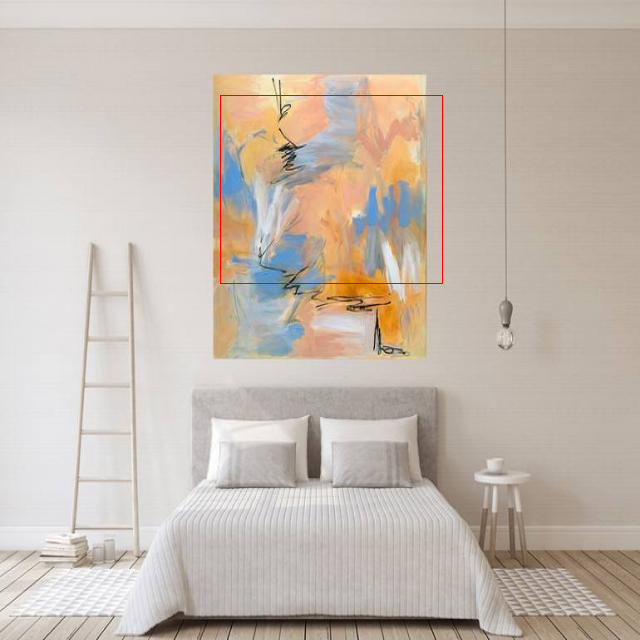

In [ ]:
vsample

In [ ]:
# type(vsample)


In [ ]:
img_file = Image.open("/content/drive/MyDrive/IMG_4649.jpeg")
# img_file = Image.open("/content/drive/MyDrive/Painting_data/test/Img109_jpg.rf.0ff2b6d58112c33152e423368f4a507d.jpg")
img_file = img_file.resize((640,640))
img_Unorm = torchvision.transforms.functional.pil_to_tensor( img_file)

In [ ]:
img = torch.div(img_Unorm,256)
IOU_score = 0.45
# IOU_score = 0.7

output = model([img.to(device)])
output
out_bbox = output[0]["boxes"]
out_scores = output[0]["scores"]
keep = torchvision.ops.nms(out_bbox,out_scores,IOU_score)
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')
vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
# for box in boxes:
#     draw.rectangle(list(box),fill = None,outline = "red")

boxes2 = out_bbox[keep[0],:]
# boxes2 = out_bbox[keep,:]
draw.rectangle(list(boxes2),fill = None,outline = "red")


In [ ]:
boxes2

tensor([258.3061,  56.9064, 538.7101, 463.5183], device='cuda:0',
       grad_fn=<SliceBackward0>)

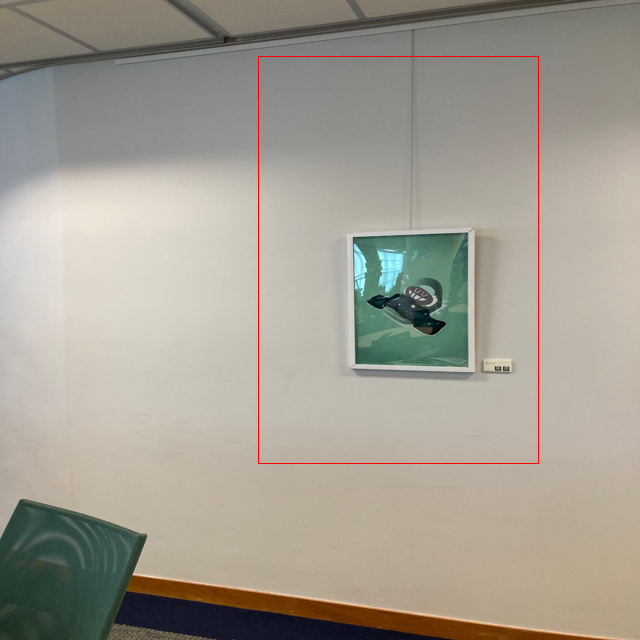

In [ ]:
vsample

960 1280
[387.0, 113.0, 808.0, 927.0]


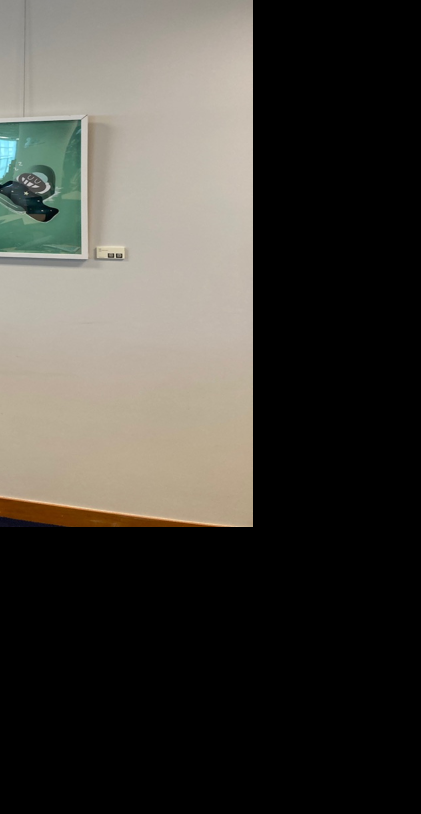

In [ ]:
img_file2 = Image.open("/content/drive/MyDrive/IMG_4649.jpeg")
igf_W ,igf_H = img_file2.size
boxes3 = tuple(boxes2.cpu().detach().numpy())
print(igf_W ,igf_H)
newCropWay = [boxes3[0]*igf_W//640 ,boxes3[1]*igf_H//640,boxes3[2]*igf_W//640 ,boxes3[3]*igf_H//640]
# img_crop=img_file.crop(tuple(newCropWay.cpu().detach().numpy()))
print(newCropWay)
img_crop=img_file.crop(tuple(newCropWay))
img_crop

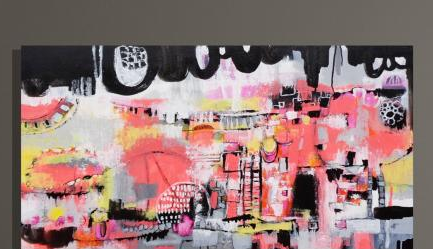

In [ ]:

img_crop=img_file.crop(tuple(boxes2.cpu().detach().numpy()))
img_crop

In [ ]:
img_side = 256
# img_side = 64
# Find Image Data
data_dir = "/content/drive/MyDrive/ust_paint_sample_photo"
train_dataSet =  torchvision.datasets.ImageFolder(data_dir,transform = T.Compose([
    T.Resize((img_side,img_side)),T.ToTensor()
]))
#  dataset = ImageFolder(data_dir,transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))

In [ ]:
from torch.utils.data import sampler
loader_train = torch.utils.data.DataLoader(train_dataSet
                                           , batch_size=16
                                          #  ,
                          # sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))
                          )
loader_val = torch.utils.data.DataLoader(train_dataSet
                                           , batch_size=4)

In [ ]:
import torch.nn.functional as F  # useful stateless functions
USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
dtype = torch.float32
print_every = 100
def check_accuracy_part34(loader, model):
    # if loader.dataset.train:
    #     print('Checking accuracy on validation set')
    # else:
    #     print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                # print()

In [ ]:
# Clear cuda Memory
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
import torch.nn as nn

model = None
optimizer = None
learning_rate = 5e-3 #1e-2 reduce
channel_1 = 32
channel_2 = 16
channel_3 = 8
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# val_a =
# val_b = val_a/2
# img_side = 150
img_side2 = img_side//8
Kern_1_pad = 2
Kern_1 = Kern_1_pad*2+1
Kern_2_pad = 1
Kern_2 = Kern_2_pad*2+1
img_side_used = img_side2
model = nn.Sequential(
    nn.Conv2d(3,channel_1,(Kern_1,Kern_1),1,Kern_1_pad,bias=True),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    # nn.LeakyReLU(),
    # nn.BatchNorm2d(channel_1),
    # nn.Sigmoid(),
    nn.Conv2d(channel_1,channel_2,(Kern_2,Kern_2),1,Kern_2_pad,bias=True),
    nn.ReLU(),
    # nn.LeakyReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.BatchNorm2d(channel_2),
    # nn.Sigmoid(),
    # nn.Conv2d(channel_2,channel_3,(3,3),1,1,bias=True),
    # nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    # nn.AvgPool2d(2, stride=2),
    nn.Flatten(),
    # Flatten(),
    # nn.Linear(channel_1*img_side_used*img_side_used,channel_2*img_side_used),
    nn.Linear(channel_2*img_side_used*img_side_used,channel_2*img_side_used),
    # nn.Softmax(dim=1)
    nn.ReLU(),
    # nn.BatchNorm1d(channel_2*img_side_used),
    nn.Linear(channel_2*img_side_used,126)


)
# you can use Nesterov momentum in optim.SGD
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)
# optimizer = optim.RMSprop(model.parameters(), lr=learning_rate,
#                      momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate,weight_decay = 0)
train_part34(model, optimizer, epochs=10)

Iteration 0, loss = 4.9121
Got 5 / 328 correct (1.52)
Iteration 0, loss = 4.8229
Got 38 / 328 correct (11.59)
Iteration 0, loss = 2.3715
Got 224 / 328 correct (68.29)
Iteration 0, loss = 0.4265
Got 266 / 328 correct (81.10)
Iteration 0, loss = 0.1369
Got 257 / 328 correct (78.35)
Iteration 0, loss = 0.0561
Got 297 / 328 correct (90.55)
Iteration 0, loss = 0.0903
Got 179 / 328 correct (54.57)
Iteration 0, loss = 0.0237
Got 306 / 328 correct (93.29)
Iteration 0, loss = 0.0177
Got 211 / 328 correct (64.33)
Iteration 0, loss = 0.0178
Got 319 / 328 correct (97.26)


In [ ]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/img_classify_model.pth')

In [ ]:
img_file = Image.open("/content/drive/MyDrive/ust_paint_sample_photo/Img_class008/DSC_3048.jpeg")
img_file = img_file.resize((img_side,img_side))
img_Unorm = torchvision.transforms.functional.pil_to_tensor( img_file)
img_Usq = torch.div(img_Unorm,256)
img=torch.unsqueeze(img_Usq, 0)

output = model(img.to(device))
# output = model([img.to(device =device ,dtype=dtype)])

In [ ]:
output

tensor([[-4.1312e+00, -6.3421e-01, -2.1830e+00, -1.0335e+00,  9.7486e-01,
          1.4609e+00,  1.2888e+00,  1.1964e+01,  3.9282e+00,  2.0604e+00,
          4.1290e+00, -2.9638e+00, -3.1077e+00, -1.7143e+00,  1.2010e+00,
         -4.8897e-02,  1.0017e+00, -4.3391e+00,  1.7208e+00, -4.8298e+00,
         -1.7079e+00, -1.3113e+00,  3.1655e-01, -2.5040e+00,  4.7462e+00,
         -5.2416e-01, -3.3029e+00, -7.3466e-01,  2.1860e-01,  2.5459e-01,
         -7.2244e-01, -1.4947e+00,  5.3985e-01, -1.7237e+00, -1.0221e+00,
         -1.4936e+00, -5.2618e+00, -2.0497e+00, -1.0848e+00, -4.1707e-01,
         -9.3120e-01,  3.2500e+00, -1.3134e+00,  1.8450e+00,  5.0758e+00,
         -1.2177e+00,  1.7615e+00, -8.8673e-01,  3.5141e+00, -7.2016e-01,
         -1.8197e+00,  5.7341e-01, -1.8713e+00,  2.6764e-02, -6.0300e-01,
         -1.2539e-01,  2.8619e-01,  3.7777e+00, -9.4299e-01, -2.0884e+00,
         -8.1618e-01, -8.5365e-01, -2.6966e+00,  2.8398e-01,  3.4966e+00,
          4.1467e+00,  1.4316e+00, -3.

In [ ]:
output.max(1)

torch.return_types.max(
values=tensor([11.9636], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([7], device='cuda:0'))